# Imports


In [633]:
from statistics import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder, StandardScaler

import statsmodels.api as sm

In [634]:
data = pd.read_csv(r"data/prediction/salary_homework.csv")
data

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [635]:
# title = data["unvan"]
# le = LabelEncoder()
# ohe = OneHotEncoder(drop="first")
# title = le.fit_transform(title)
# title = title.reshape(-1, 1)
# title = ohe.fit_transform(title).toarray()
# title_df = pd.DataFrame(data=title, columns=le.classes_[1:])
# title_df.head()

In [636]:
# final_df = pd.concat([data.drop(columns=[])], axis=1)
# final_df.head()

final_df = data
final_df.head()

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500


# gerekli gereksiz değişken


In [637]:
final_df = final_df.drop(columns=["Calisan ID", "unvan", "Kidem", "Puan"])
final_df.head()

,UnvanSeviyesi,maas
0,1,2250
1,2,2500
2,3,3000
3,4,4000
4,5,5500


In [638]:
final_df.iloc[:, :].corr()["maas"]

UnvanSeviyesi    0.727036
maas             1.000000
Name: maas, dtype: float64

In [639]:
px = final_df.iloc[:, :-1].values
py = final_df.iloc[:, -1].values
model = sm.OLS(py, px).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.676
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              60.59
Date:                Sat, 07 Sep 2024   Prob (F-statistic):                    1.39e-08
Time:                        02:19:20   Log-Likelihood:                         -318.10
No. Observations:                  30   AIC:                                      638.2
Df Residuals:                      29   BIC:                                      639.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2269.9134    291.626      7.784      0.000    1673.472    2866.355
==============================================================================
Omnibus:                       42.594   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.872
Skew:                           3.058   Prob(JB):                     9.46e-32
Kurtosis:                      11.768   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MLR PR SVR DT RF


In [640]:
x_df = final_df.drop(columns=["maas"])
y_df = final_df["maas"]
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=.33, random_state=0)

In [641]:
sc = StandardScaler()
X_train = pd.DataFrame(data=sc.fit_transform(x_train), columns=x_train.columns)
X_test = pd.DataFrame(data=sc.transform(x_test), columns=x_train.columns)
Px = pd.DataFrame(data=sc.fit_transform(px), columns=x_train.columns)

# MLR


c:\Users\cumon\Desktop\DATATHON\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


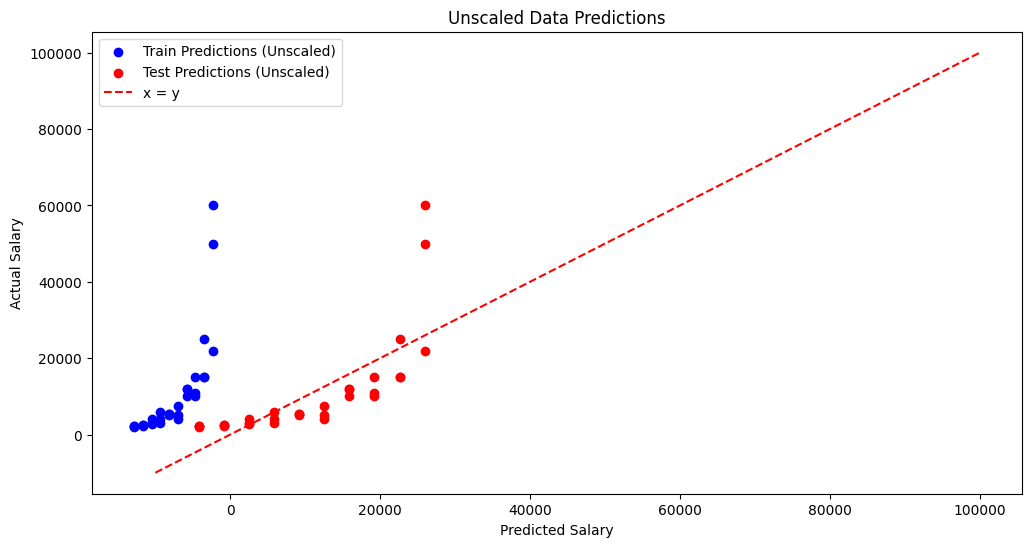

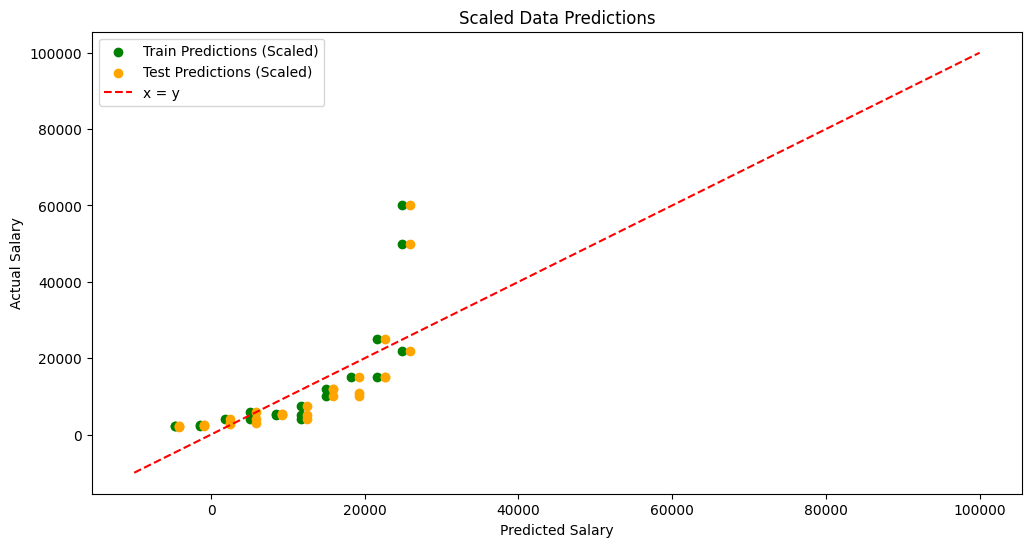

Mean Squared Error (Scaled Data): 82662794.94949494
R-squared (Scaled Data): 0.5285811733746243

Mean Squared Error (Unscaled Data): 82662794.94949494
R-squared (Unscaled Data): 0.5285811733746243


In [642]:
mlr_unscaled = LinearRegression()
mlr_unscaled.fit(px, py,)
mlr_pred_unscaled = mlr_unscaled.predict(px)


mlr_scaled = LinearRegression()
mlr_scaled.fit(Px, py)
mlr_pred_scaled = mlr_scaled.predict(Px)

# print(sm.OLS(mlr_pred_unscaled, x_test).fit().summary())
# print(sm.OLS(mlr_pred_scaled, X_test).fit().summary())

print()

# Unscaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mlr_unscaled.predict(Px), py, color='blue', label='Train Predictions (Unscaled)')
plt.scatter(mlr_pred_unscaled, py, color='red', label='Test Predictions (Unscaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Unscaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

# Scaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mlr_scaled.predict(X_train), y_train, color='green', label='Train Predictions (Scaled)')
plt.scatter(mlr_pred_scaled, py, color='orange', label='Test Predictions (Scaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Scaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

mlr_mse_unscaled = mean_squared_error(py, mlr_pred_unscaled)
mlr_r2_unscaled = r2_score(py, mlr_pred_unscaled)

mlr_mse_scaled = mean_squared_error(py, mlr_pred_scaled)
mlr_r2_scaled = r2_score(py, mlr_pred_scaled)

print(f"Mean Squared Error (Scaled Data): {mlr_mse_scaled}")
print(f"R-squared (Scaled Data): {mlr_r2_scaled}")
print()
print(f"Mean Squared Error (Unscaled Data): {mlr_mse_unscaled}")
print(f"R-squared (Unscaled Data): {mlr_r2_unscaled}")

# PR


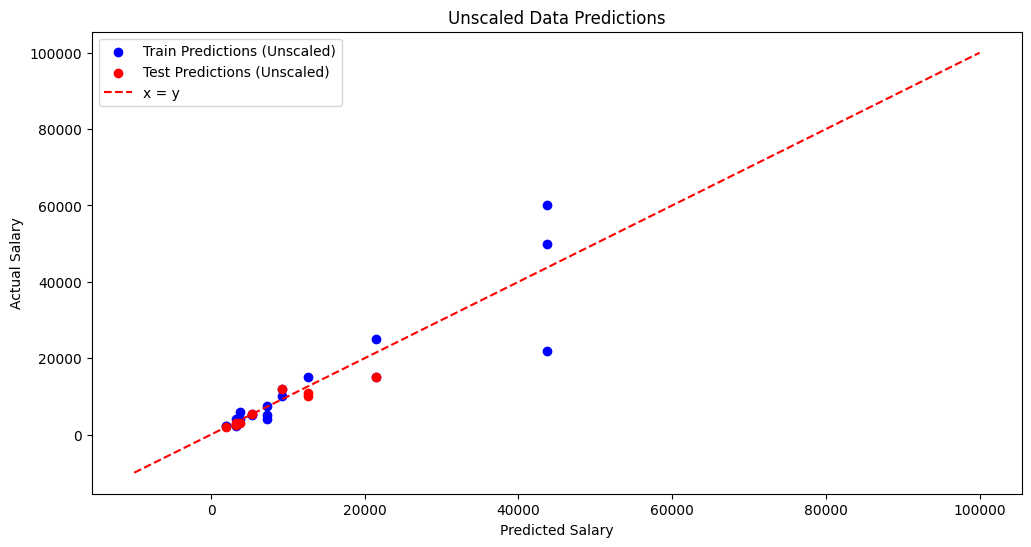

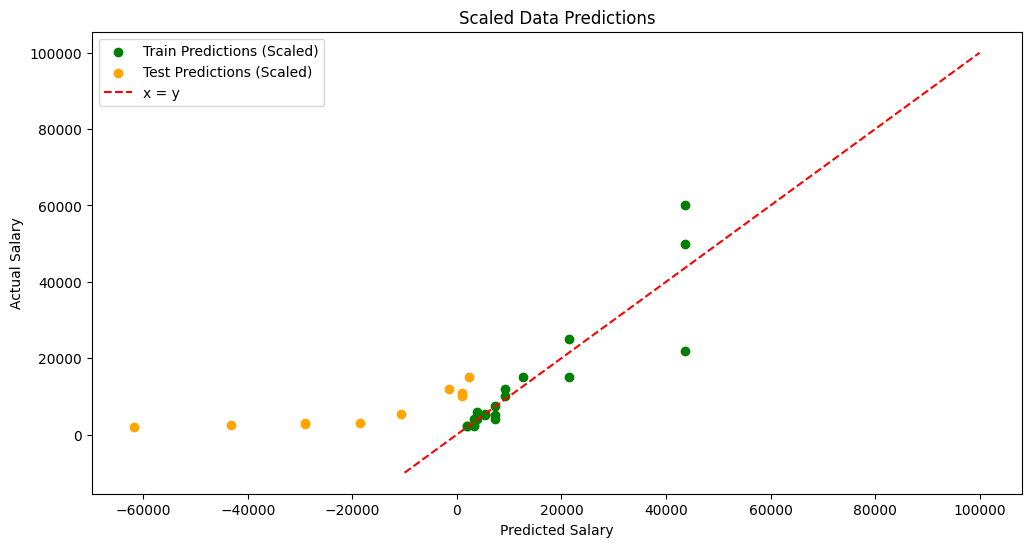

Mean Squared Error (Scaled Data): 944275268.8919395
R-squared (Scaled Data): -43.888323828653576

Mean Squared Error (Unscaled Data): 6138019.903529489
R-squared (Unscaled Data): 0.7082149303564116


In [643]:
degree = 5

prf_unscaled = PolynomialFeatures(degree=degree)
pr_unscaled = LinearRegression()
pr_unscaled.fit(prf_unscaled.fit_transform(x_train), y_train)
pr_pred_unscaled = pr_unscaled.predict(prf_unscaled.transform(x_test))

prf_scaled = PolynomialFeatures(degree=degree)
pr_scaled = LinearRegression()
pr_scaled.fit(prf_scaled.fit_transform(X_train), y_train)
pr_pred_scaled = pr_unscaled.predict(prf_scaled.transform(X_test))

# Unscaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(pr_unscaled.predict(prf_unscaled.transform(x_train)), y_train, color='blue', label='Train Predictions (Unscaled)')
plt.scatter(pr_pred_unscaled, y_test, color='red', label='Test Predictions (Unscaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Unscaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

# Scaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(pr_scaled.predict(prf_scaled.transform(X_train)), y_train, color='green', label='Train Predictions (Scaled)')
plt.scatter(pr_pred_scaled, y_test, color='orange', label='Test Predictions (Scaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Scaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

pr_mse_unscaled = mean_squared_error(y_test, pr_pred_unscaled)
pr_r2_unscaled = r2_score(y_test, pr_pred_unscaled)

pr_mse_scaled = mean_squared_error(y_test, pr_pred_scaled)
pr_r2_scaled = r2_score(y_test, pr_pred_scaled)

print(f"Mean Squared Error (Scaled Data): {pr_mse_scaled}")
print(f"R-squared (Scaled Data): {pr_r2_scaled}")
print()
print(f"Mean Squared Error (Unscaled Data): {pr_mse_unscaled}")
print(f"R-squared (Unscaled Data): {pr_r2_unscaled}")

# SVR


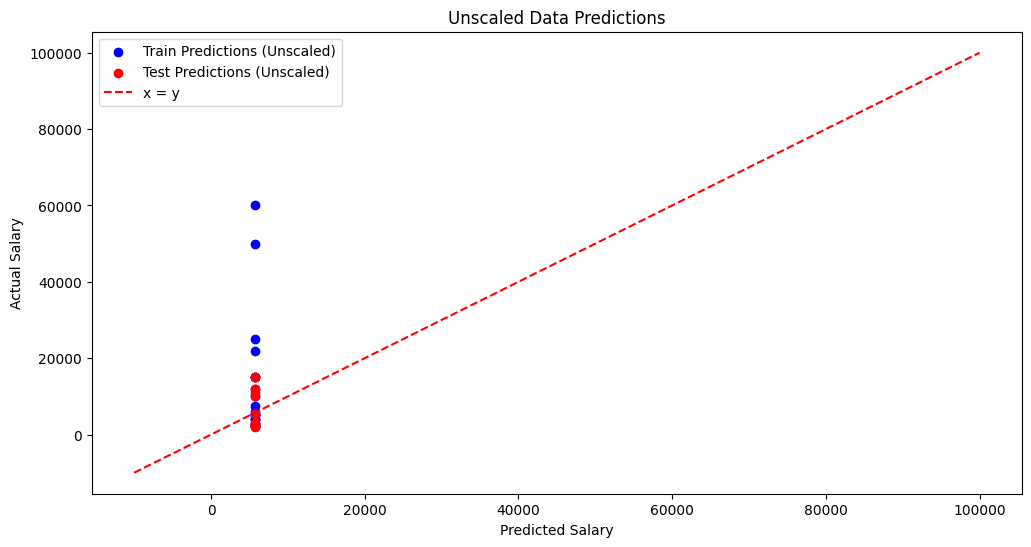

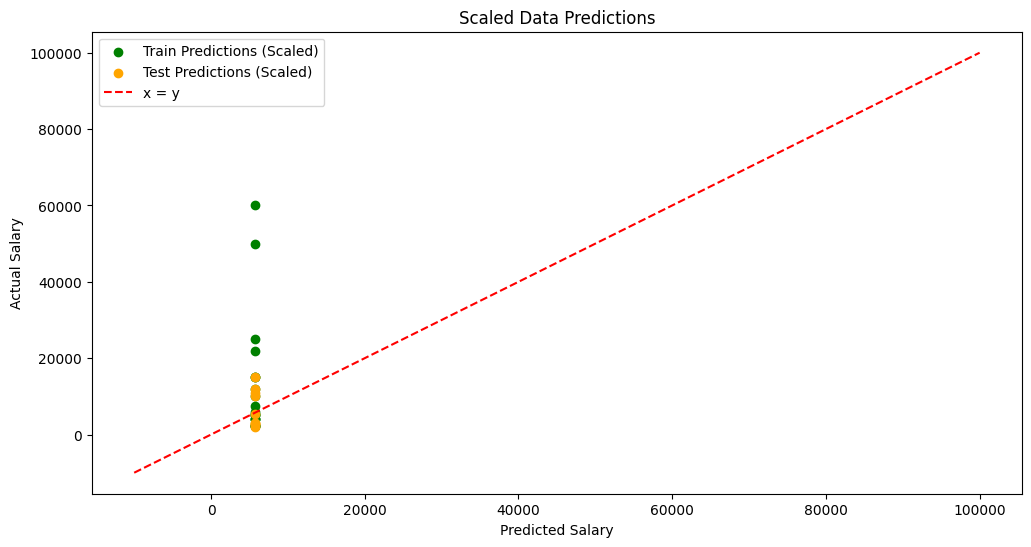

Mean Squared Error (Scaled Data): 21892454.186520778
R-squared (Scaled Data): -0.04070879043742792

Mean Squared Error (Unscaled Data): 21836501.109767888
R-squared (Unscaled Data): -0.03804893063675707


In [644]:
kernel = "rbf"

svr_unscaled = SVR(kernel=kernel)
svr_unscaled.fit(x_train, y_train)
svr_pred_unscaled = svr_unscaled.predict(x_test)

svr_scaled = SVR(kernel=kernel)
svr_scaled.fit(X_train, y_train)
svr_pred_scaled = svr_unscaled.predict(X_test)

# Unscaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(svr_unscaled.predict(x_train), y_train, color='blue', label='Train Predictions (Unscaled)')
plt.scatter(svr_pred_unscaled, y_test, color='red', label='Test Predictions (Unscaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Unscaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

# Scaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(svr_scaled.predict(X_train), y_train, color='green', label='Train Predictions (Scaled)')
plt.scatter(svr_pred_scaled, y_test, color='orange', label='Test Predictions (Scaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Scaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

svr_mse_unscaled = mean_squared_error(y_test, svr_pred_unscaled)
svr_r2_unscaled = r2_score(y_test, svr_pred_unscaled)

svr_mse_scaled = mean_squared_error(y_test, svr_pred_scaled)
svr_r2_scaled = r2_score(y_test, svr_pred_scaled)

print(f"Mean Squared Error (Scaled Data): {svr_mse_scaled}")
print(f"R-squared (Scaled Data): {svr_r2_scaled}")
print()
print(f"Mean Squared Error (Unscaled Data): {svr_mse_unscaled}")
print(f"R-squared (Unscaled Data): {svr_r2_unscaled}")

# DT


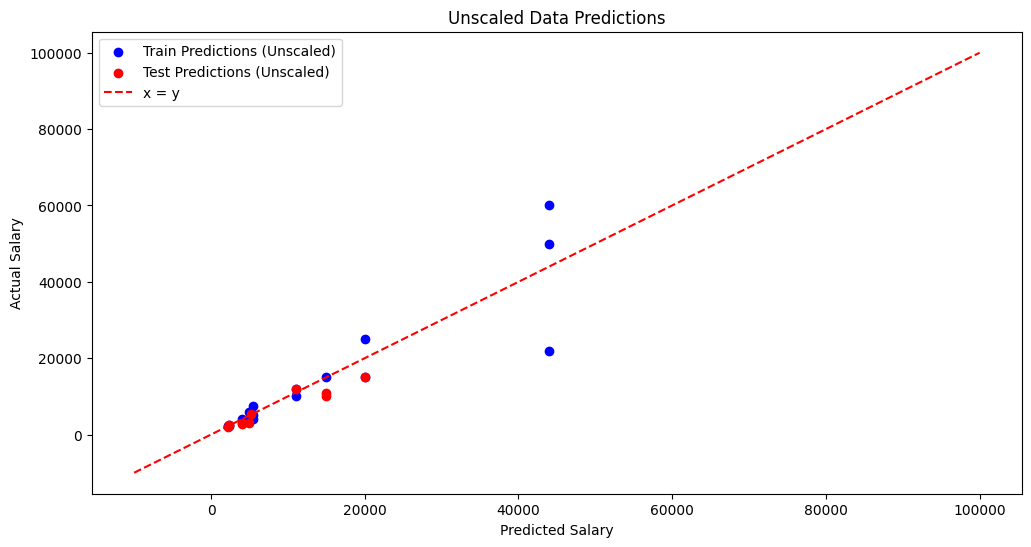

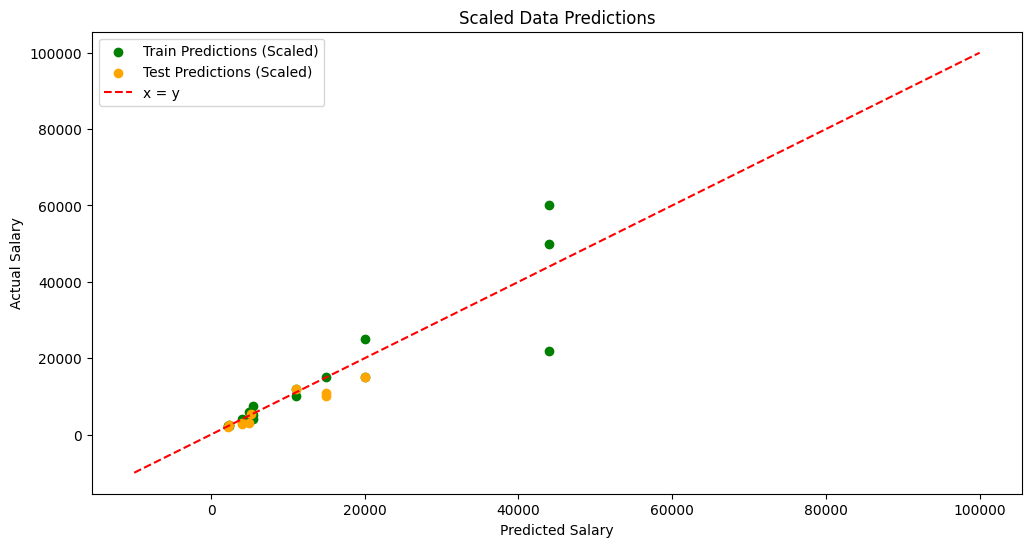

Mean Squared Error (Scaled Data): 7353562.5
R-squared (Scaled Data): 0.650431282414516

Mean Squared Error (Unscaled Data): 7353562.5
R-squared (Unscaled Data): 0.650431282414516


In [645]:
random_state = 0

dt_unscaled = DecisionTreeRegressor(random_state=random_state)
dt_unscaled.fit(x_train, y_train)
dt_pred_unscaled = dt_unscaled.predict(x_test)

dt_scaled = DecisionTreeRegressor(random_state=random_state)
dt_scaled.fit(X_train, y_train)
dt_pred_scaled = dt_scaled.predict(X_test)

# Unscaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(dt_unscaled.predict(x_train), y_train, color='blue', label='Train Predictions (Unscaled)')
plt.scatter(dt_pred_unscaled, y_test, color='red', label='Test Predictions (Unscaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Unscaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

# Scaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(dt_scaled.predict(X_train), y_train, color='green', label='Train Predictions (Scaled)')
plt.scatter(dt_pred_scaled, y_test, color='orange', label='Test Predictions (Scaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Scaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

dt_mse_unscaled = mean_squared_error(y_test, dt_pred_unscaled)
dt_r2_unscaled = r2_score(y_test, dt_pred_unscaled)

dt_mse_scaled = mean_squared_error(y_test, dt_pred_scaled)
dt_r2_scaled = r2_score(y_test, dt_pred_scaled)

print(f"Mean Squared Error (Scaled Data): {dt_mse_scaled}")
print(f"R-squared (Scaled Data): {dt_r2_scaled}")
print()
print(f"Mean Squared Error (Unscaled Data): {dt_mse_unscaled}")
print(f"R-squared (Unscaled Data): {dt_r2_unscaled}")

# RF


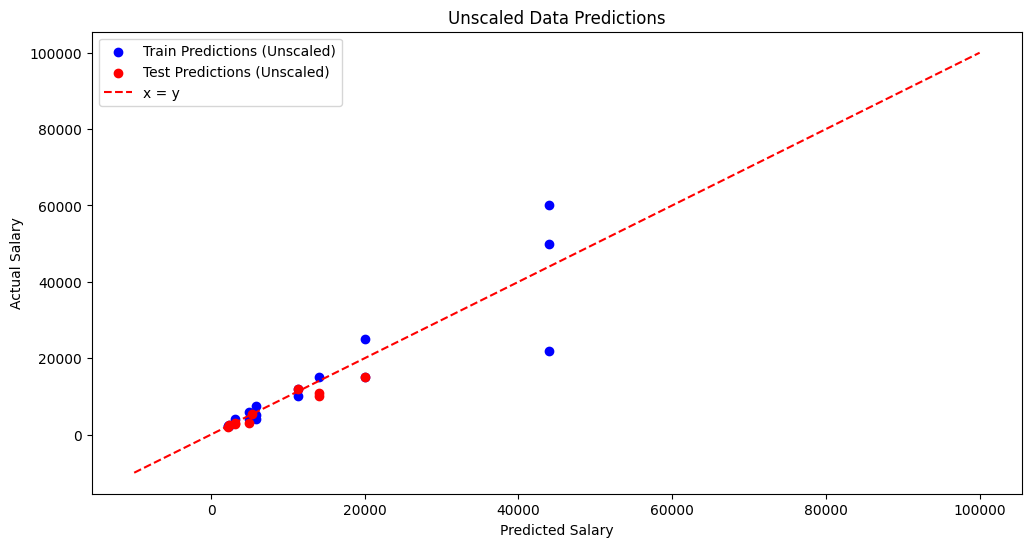

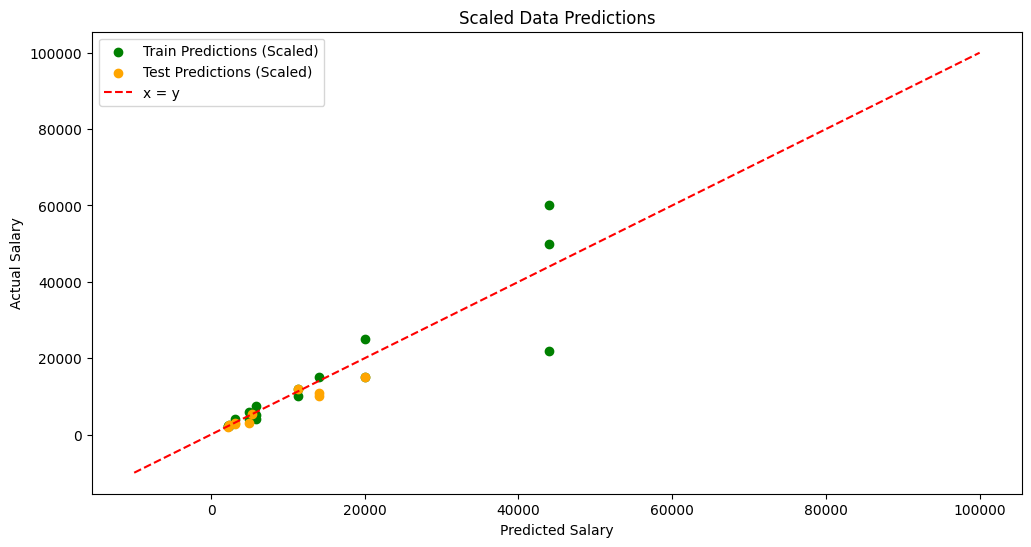

Mean Squared Error (Scaled Data): 5599483.136111112
R-squared (Scaled Data): 0.7338155296794029

Mean Squared Error (Unscaled Data): 5599483.136111112
R-squared (Unscaled Data): 0.7338155296794029


In [646]:
n_estimators = 10
random_state = 0

rf_unscaled = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
rf_unscaled.fit(x_train, y_train.values)
rf_pred_unscaled = rf_unscaled.predict(x_test)

rf_scaled = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
rf_scaled.fit(X_train, y_train.values)
rf_pred_scaled = rf_scaled.predict(X_test)

# Unscaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(rf_unscaled.predict(x_train), y_train, color='blue', label='Train Predictions (Unscaled)')
plt.scatter(rf_pred_unscaled, y_test, color='red', label='Test Predictions (Unscaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Unscaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

# Scaled data için scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(rf_scaled.predict(X_train), y_train, color='green', label='Train Predictions (Scaled)')
plt.scatter(rf_pred_scaled, y_test, color='orange', label='Test Predictions (Scaled)')
plt.plot([-10000, 100000], [-10000, 100000], color='red', linestyle='--', label='x = y')
plt.title('Scaled Data Predictions')
plt.xlabel('Predicted Salary')
plt.ylabel('Actual Salary')
plt.legend()
plt.show()

rf_mse_unscaled = mean_squared_error(y_test, rf_pred_unscaled)
rf_r2_unscaled = r2_score(y_test, rf_pred_unscaled)

rf_mse_scaled = mean_squared_error(y_test, rf_pred_scaled)
rf_r2_scaled = r2_score(y_test, rf_pred_scaled)

print(f"Mean Squared Error (Scaled Data): {rf_mse_scaled}")
print(f"R-squared (Scaled Data): {rf_r2_scaled}")
print()
print(f"Mean Squared Error (Unscaled Data): {rf_mse_unscaled}")
print(f"R-squared (Unscaled Data): {rf_r2_unscaled}")

# BAŞARI KARŞILAŞTIR


In [647]:
success_data = [
    [mlr_mse_unscaled, mlr_mse_scaled, mlr_r2_unscaled, mlr_r2_scaled],
    [pr_mse_unscaled, pr_mse_scaled, pr_r2_unscaled, pr_r2_scaled],
    [svr_mse_unscaled, svr_mse_scaled, svr_r2_unscaled, svr_r2_scaled],
    [dt_mse_unscaled, dt_mse_scaled, dt_r2_unscaled, dt_r2_scaled],
    [rf_mse_unscaled, rf_mse_scaled, rf_r2_unscaled, rf_r2_scaled],

]
success_df = pd.DataFrame(data=success_data, index=["MLR", "PR", "SVR", "DT", "RF"], columns=["Unscaled MSE", "Scaled MSE", "Unscaled R-squared", "Scaled R-Squared"])
success_df

,Unscaled MSE,Scaled MSE,Unscaled R-squared,Scaled R-Squared
MLR,8.266279e+07,8.266279e+07,0.528581,0.528581
PR,6.138020e+06,9.442753e+08,0.708215,-43.888324
SVR,2.183650e+07,2.189245e+07,-0.038049,-0.040709
DT,7.353562e+06,7.353562e+06,0.650431,0.650431
RF,5.599483e+06,5.599483e+06,0.733816,0.733816


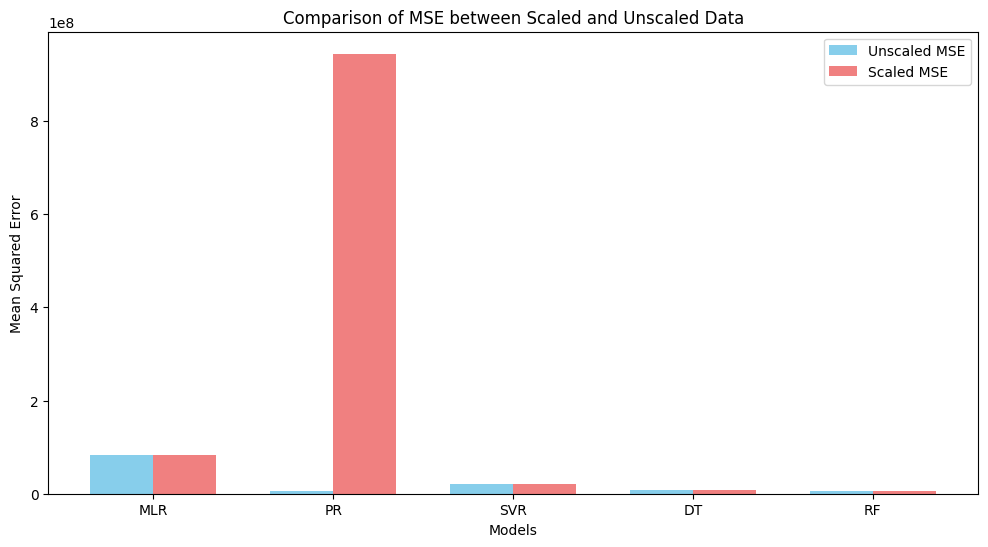

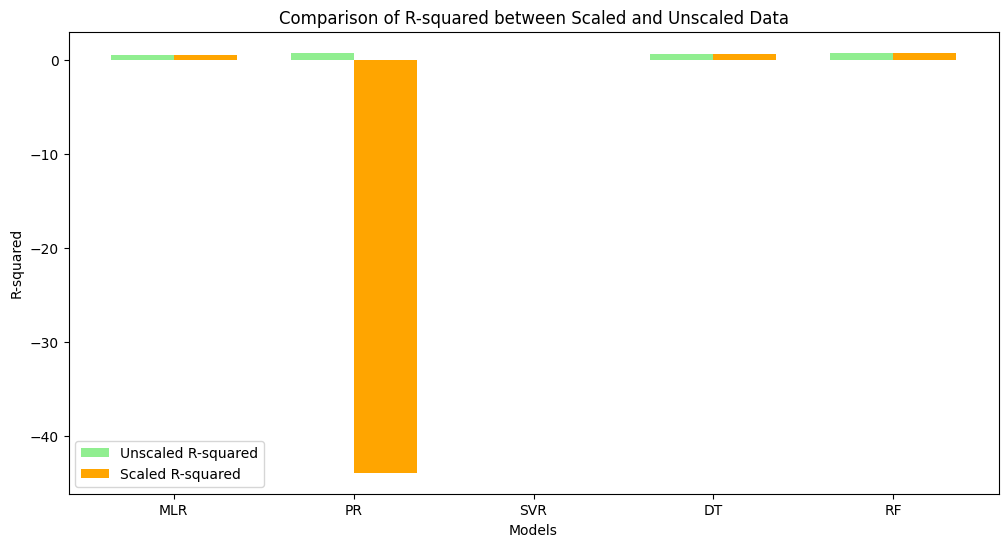

In [648]:
import matplotlib.pyplot as plt

# DataFrame'i görselleştirmek için gereken veriler
models = success_df.index.tolist()
unscaled_mse = success_df["Unscaled MSE"].tolist()
scaled_mse = success_df["Scaled MSE"].tolist()
unscaled_r2 = success_df["Unscaled R-squared"].tolist()
scaled_r2 = success_df["Scaled R-Squared"].tolist()

# MSE Karşılaştırma Bar Grafiği
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, unscaled_mse, bar_width, label='Unscaled MSE', color='skyblue')
plt.bar([i + bar_width for i in index], scaled_mse, bar_width, label='Scaled MSE', color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE between Scaled and Unscaled Data')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.show()

# R-squared Karşılaştırma Bar Grafiği
plt.figure(figsize=(12, 6))
plt.bar(index, unscaled_r2, bar_width, label='Unscaled R-squared', color='lightgreen')
plt.bar([i + bar_width for i in index], scaled_r2, bar_width, label='Scaled R-squared', color='orange')

plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared between Scaled and Unscaled Data')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.show()

# 10 yıl tecrübeli ve 100 puan almış bir CEO ve aynı özelliklere sahip bir Müdürün maaşlarını 5 yöntemle de tahmin edip sonuçları yorumla


In [649]:
final_df.head(1)

,UnvanSeviyesi,maas
0,1,2250
